# **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
#Mounting to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Changing path to the location where the Dataset is downloaded**

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#!unzip -xvf "customer-segmentation-dataset.zip" -d "/content/drive/MyDrive/output_folder" 

# **Loading the dataset**

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data1= pd.read_csv('Mall_Customers.csv')

In [ ]:
#Loading the first five rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Descriptive statistics of the numerical attributes of the dataset**

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Descriptive statistics of the categorical attributes of the dataset**

In [ ]:
data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


#**Exploratory Data Analysis**

**Boxplot before deleting outliers**

In [ ]:
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

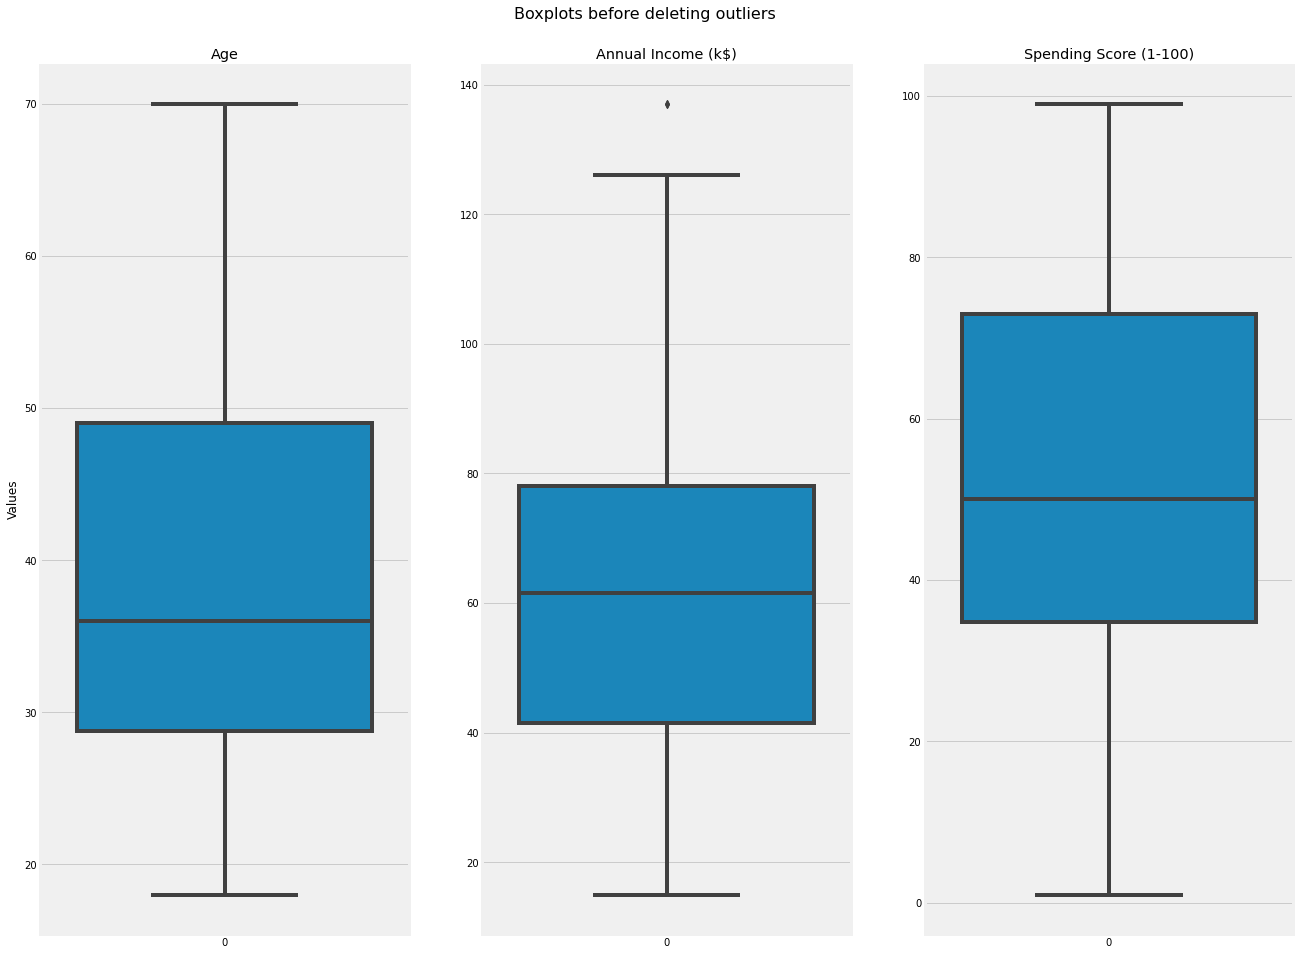

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=data, columns_list=numeric_columns, rows=1, cols=3, suptitle='Boxplots before deleting outliers')

**Outlier Removal**

In [ ]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

data_filtered = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) |(data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(data.shape)
display(data_filtered.shape)

Here we will get IQR for each column
 Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


(200, 5)

(198, 5)

**Boxplot after deleting outliers**

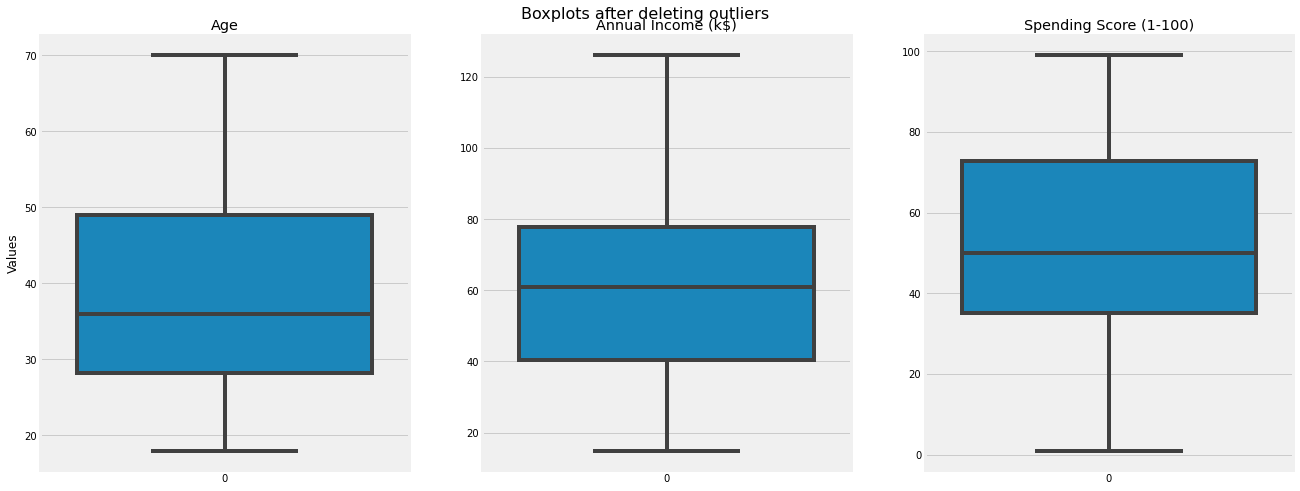

In [ ]:
boxplots_custom(dataset=data_filtered, columns_list=numeric_columns, rows=1,
                cols=3, suptitle='Boxplots after deleting outliers',size=(20,8))

**Correlation plot**

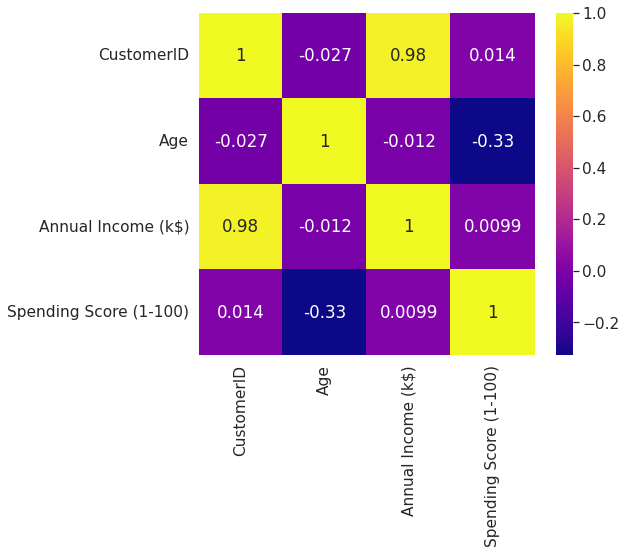

In [ ]:
cor = data.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

**Distribution Plots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

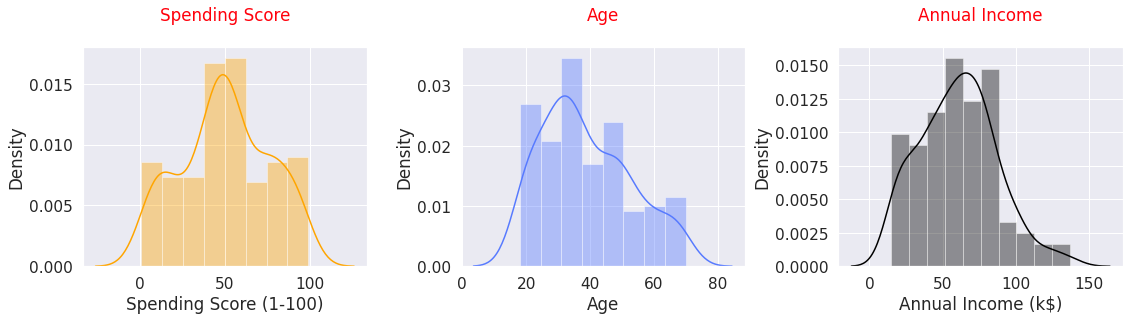

In [ ]:
plt.figure(figsize=(16,12))

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='#FF000B')
sns.distplot(data['Spending Score (1-100)'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='#FF000B')
sns.distplot(data['Age'], color='#577AFF')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='#FF000B')
sns.distplot(data['Annual Income (k$)'], color='black')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


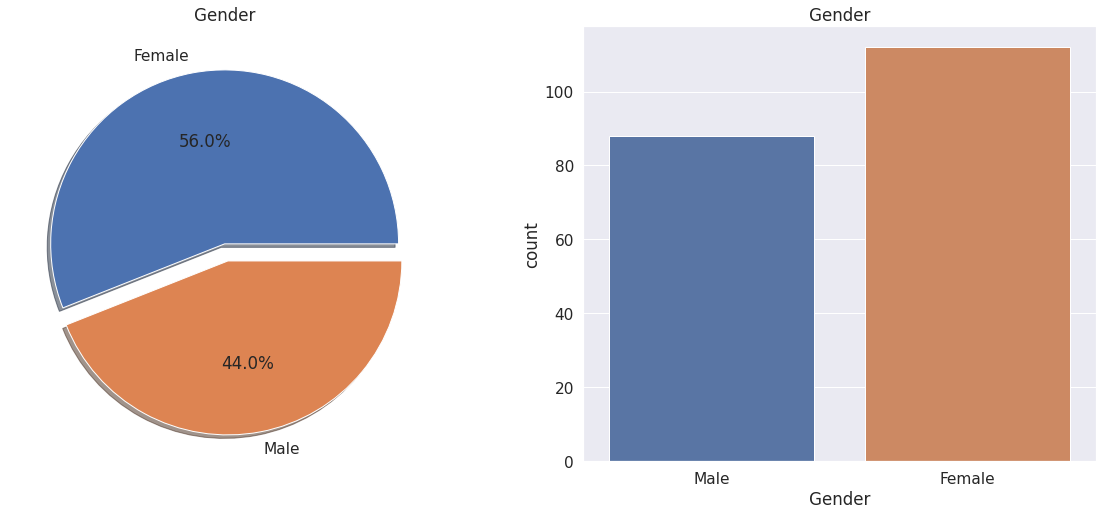

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')
sns.countplot('Gender',data=data,ax=ax[1])
ax[1].set_title('Gender')
plt.show()

# **Data Preprocessing**

---



**Removing CustomerID since it is not redundant**

In [ ]:
data.drop(columns = ['CustomerID'],inplace = True)

**Checking for missing values**

In [ ]:
data.isnull().sum()
#There are no missing values in the dataset

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Gender is a nominal column . It is the first column in the above data frame . We will take it and do One Hot Encoding.**

In [ ]:
data['Gender']= pd.get_dummies(data.Gender,drop_first = True)

# **Model Building**

In [ ]:
#Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters)
#where each data point belongs to only one group. 
#It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. 
from sklearn.cluster import KMeans

**Splitting the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data,test_size = 0.05, random_state = 0)

In [ ]:
X_train.shape

(190, 4)

In [ ]:
X_test.shape

(10, 4)

**A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.**

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = X_train
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

## DISORTION

**Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.**

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 35.4815677834514
2 : 30.094868981688894
3 : 24.070753045711776
4 : 20.593552685291694
5 : 18.053706032127927
6 : 15.618395759602436
7 : 14.694520256837526
8 : 13.983115480820569
9 : 13.302218629962377


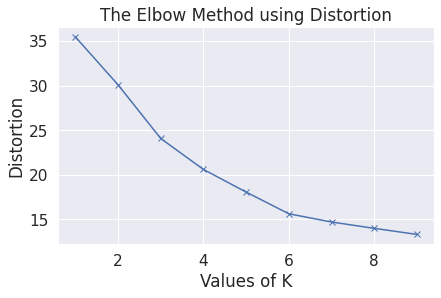

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# *From the above plot we see that the optimum number of clusters k is around 6*

## INERTIA

**Inertia: It is the sum of squared distances of samples to their closest cluster center**

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 292384.35263157886
2 : 202491.06046616373
3 : 136531.14039460564
4 : 100105.9779989059
5 : 73608.59854180907
6 : 56507.73112589166
7 : 49200.74382282344
8 : 42759.13546070711
9 : 39035.914261664264


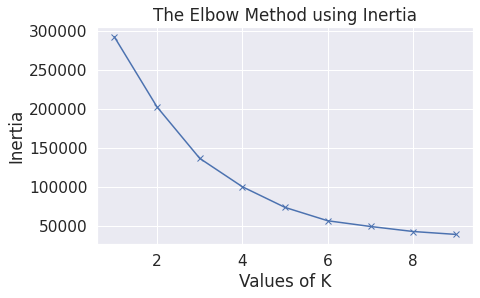

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# *From the above plot we see that optimum number of clusters is around 6.*

# **Selection of k**

**To determine the optimal number of clusters, we have to select the value of k at the “elbow”.That is the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 6.**

In [ ]:
algorithm = KMeans(n_clusters=6)
algorithm.fit(X_train)

KMeans(n_clusters=6)

In [ ]:
#Algorithm
algorithm.labels_

array([1, 2, 4, 4, 0, 5, 5, 4, 5, 0, 2, 2, 5, 2, 0, 2, 2, 2, 1, 3, 3, 0,
       4, 1, 3, 2, 2, 3, 0, 0, 4, 0, 3, 1, 4, 0, 3, 1, 0, 2, 0, 1, 4, 1,
       2, 3, 3, 4, 0, 0, 2, 0, 2, 5, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 4, 0,
       0, 3, 5, 2, 2, 0, 4, 2, 0, 0, 3, 0, 4, 2, 5, 3, 4, 0, 4, 4, 2, 1,
       1, 1, 4, 2, 0, 3, 1, 0, 1, 0, 2, 5, 1, 1, 1, 0, 5, 2, 5, 4, 2, 3,
       5, 1, 0, 1, 1, 0, 5, 0, 4, 4, 3, 1, 1, 1, 2, 2, 4, 1, 2, 5, 0, 0,
       5, 0, 1, 5, 1, 4, 0, 1, 1, 2, 5, 3, 2, 0, 2, 4, 3, 3, 1, 2, 5, 4,
       2, 4, 3, 1, 2, 2, 5, 1, 0, 0, 1, 4, 2, 0, 1, 5, 2, 1, 4, 4, 4, 5,
       1, 4, 1, 0, 1, 3, 5, 5, 1, 0, 4, 0, 1, 4], dtype=int32)

In [ ]:
#Cluster centers 
algorithm.cluster_centers_

array([[ 0.41860465, 56.39534884, 52.97674419, 49.3255814 ],
       [ 0.36842105, 27.31578947, 57.5       , 48.44736842],
       [ 0.44736842, 32.84210526, 86.5       , 82.47368421],
       [ 0.36842105, 43.        , 25.52631579, 19.26315789],
       [ 0.53333333, 41.26666667, 89.23333333, 16.2       ],
       [ 0.40909091, 25.68181818, 26.72727273, 78.68181818]])

In [ ]:
#Number of iterations made
algorithm.n_iter_

3

# **Principal component analysis**

PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame. The columns of the DataFrame produced from the PCA procedure are called Principal Components. We will use these principal components to help us visualize our clusters in 1-D, 2-D, and 3-D space, since we cannot easily visualize the data we have in higher dimensions. For example, we can use two principal components to visualize the clusters in 2-D space, or three principal components to visualize the clusters in 3-D space.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_2 = pca.fit_transform(X_train)
data_2

array([[-1.72684577e+00, -1.66294793e+01],
       [ 2.75416607e+01, -8.06359542e+00],
       [ 6.48886480e+00,  4.02086689e+01],
       [-1.90526339e+01,  3.51256227e+01],
       [-7.05313050e+00, -2.97506547e+00],
       [ 1.21932098e+01, -6.10259530e+01],
       [ 2.02330948e+01, -4.83339757e+01],
       [-2.86794689e+01,  3.34084504e+01],
       [ 3.59482616e+00, -3.51949662e+01],
       [-1.05842203e+01, -4.47499045e-01],
       [ 5.29219938e+01,  8.20343187e+00],
       [ 4.80165271e+01, -1.41096285e+01],
       [ 1.23491992e+00, -2.73577926e+01],
       [ 2.92045002e+01,  5.84131817e-01],
       [-1.00733015e+01, -1.06499771e+01],
       [ 3.66299216e+01, -1.57965568e+01],
       [ 5.05224996e+01,  3.77351187e+00],
       [ 6.04629475e+01,  4.03667367e+00],
       [ 1.02765502e+01,  3.06499549e+00],
       [-3.25925148e+01, -3.14335537e+00],
       [-3.50081051e+01, -2.35514544e+01],
       [-1.95951488e+01, -7.52657262e+00],
       [-1.75430230e+01,  3.40454468e+01],
       [ 7.

In [ ]:
import seaborn as sns

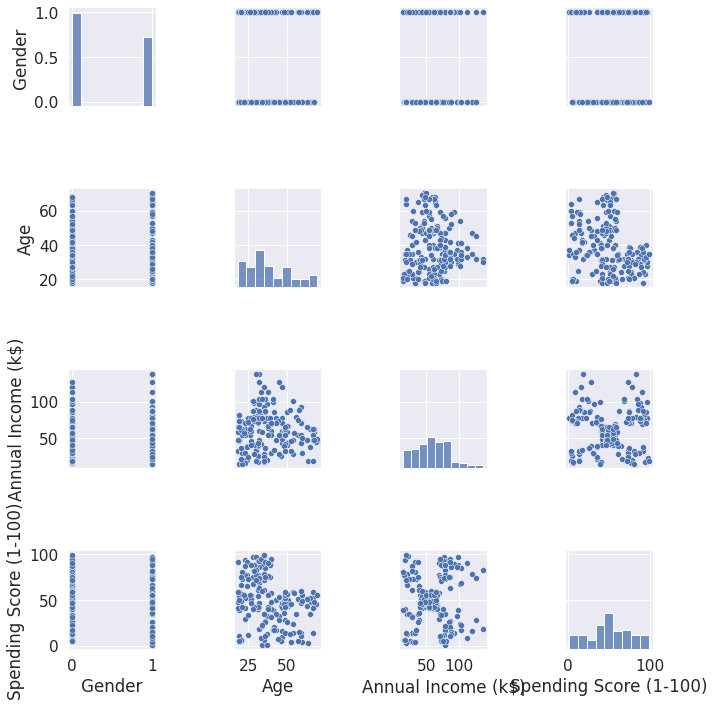

In [ ]:
sns.pairplot(X_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


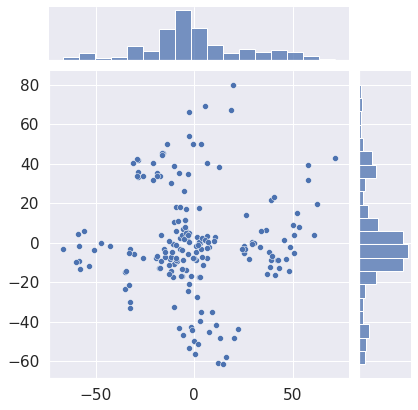

In [ ]:
sns.jointplot(data_2[:,0],data_2[:,1])

In [ ]:
pca.components_

array([[-3.90649915e-04, -1.79208314e-01,  5.82038045e-01,
         7.93168293e-01],
       [ 1.03373976e-03,  1.28376580e-01,  8.13161319e-01,
        -5.67703316e-01]])

In [ ]:
pca.explained_variance_ratio_

array([0.45453298, 0.43379727])

In [ ]:
X_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
61,1,19,46,55
125,0,31,70,77
180,0,37,97,32
154,0,47,78,16
80,1,57,54,51
...,...,...,...,...
67,0,68,48,48
192,1,33,113,8
117,0,49,65,59
47,0,27,40,47


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pc=pca.fit_transform(X_train)

pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
target=pd.DataFrame(algorithm.labels_,columns=['target'])
X_=pd.concat([pdf,target],axis=1)
X_.head()

,principal component 1,principal component 2,target
0,-1.726846,-16.629479,1
1,27.541661,-8.063595,2
2,6.488865,40.208669,4
3,-19.052634,35.125623,4
4,-7.053131,-2.975065,0


In [ ]:
X_.tail()

,principal component 1,principal component 2,target
185,-14.895764,-4.739815,0
186,-2.518123,66.331657,4
187,7.128692,0.400036,0
188,-12.997696,-15.940842,1
189,-16.602400,44.439186,4


In [ ]:
target1=pd.DataFrame(algorithm.labels_,columns=['target'])

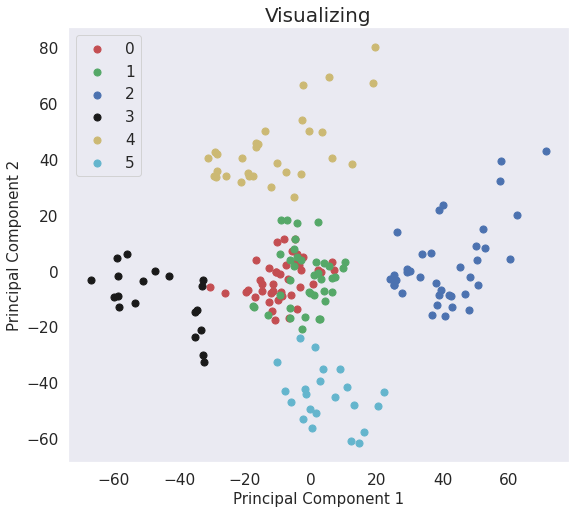

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Visualizing', fontsize = 20)
targets = [0,1,2,3,4,5]
colors = ['r', 'g','b','k','y','c']
for target, color in zip(targets,colors):
    indicesToKeep = X_['target'] == target
    ax.scatter(X_.loc[indicesToKeep,'principal component 1']
               , X_.loc[indicesToKeep,'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Predicting on the test data**

In [ ]:
y_pred = algorithm.predict(X_test)
print("Input data\n",X_test)
print("Predicted cluster\n",y_pred)

Input data
      Gender  Age  Annual Income (k$)  Spending Score (1-100)
18        1   52                  23                      29
170       1   40                  87                      13
107       1   54                  63                      46
98        1   48                  61                      42
177       1   27                  88                      69
182       1   46                  98                      15
5         0   22                  17                      76
146       1   48                  77                      36
12        0   58                  20                      15
152       0   44                  78                      20
Predicted cluster
 [3 4 0 0 2 4 5 4 3 4]


# **Generating pickle file to deploy on streamlit**

In [ ]:
import pickle 
pickle_out = open("KMeans_customer_deployed", mode = "wb") 
pickle.dump(algorithm, pickle_out) 
pickle_out.close()

In [ ]:
#!pip3 freeze requirements.txt

In [ ]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X_post=pd.concat([data1,target1],axis=1)
X_post.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,1.0
1,2,Male,21,15,81,2.0
2,3,Female,20,16,6,4.0
3,4,Female,23,16,77,4.0
4,5,Female,31,17,40,0.0


In [ ]:
X_post.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income (k$)         0
Spending Score (1-100)     0
target                    10
dtype: int64

In [ ]:
X_post.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income (k$)         0
Spending Score (1-100)     0
target                    10
dtype: int64

In [ ]:
X_post=X_post.dropna()

In [ ]:
X_post['target'] = X_post['target'].astype(int)

In [ ]:
X_post

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
185,186,Male,30,99,97,0
186,187,Female,54,101,24,4
187,188,Male,28,101,68,0
188,189,Female,41,103,17,1


In [ ]:
X_post.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
target                     int64
dtype: object

In [ ]:
!pip install sweetviz
import sweetviz

     |████████████████████████████████| 15.1 MB 9.0 MB/s 


In [ ]:
feature_config = sweetviz.FeatureConfig(force_num=["target"])

In [ ]:

my_report = sweetviz.analyze(X_post, target_feat="target", feat_cfg=feature_config)
my_report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
X_post

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
185,186,Male,30,99,97,0
186,187,Female,54,101,24,4
187,188,Male,28,101,68,0
188,189,Female,41,103,17,1


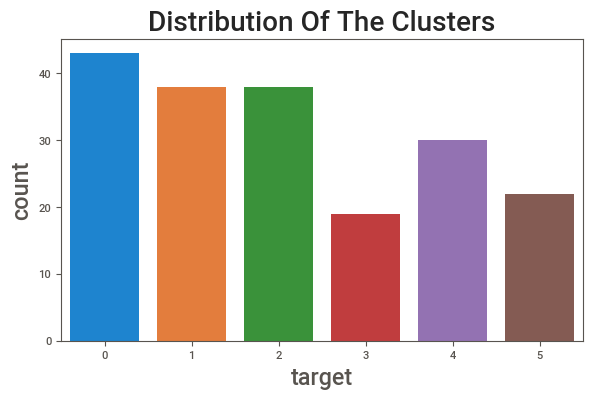

In [ ]:
pl = sns.countplot(x=X_post["target"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**Clusters interpretation**

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


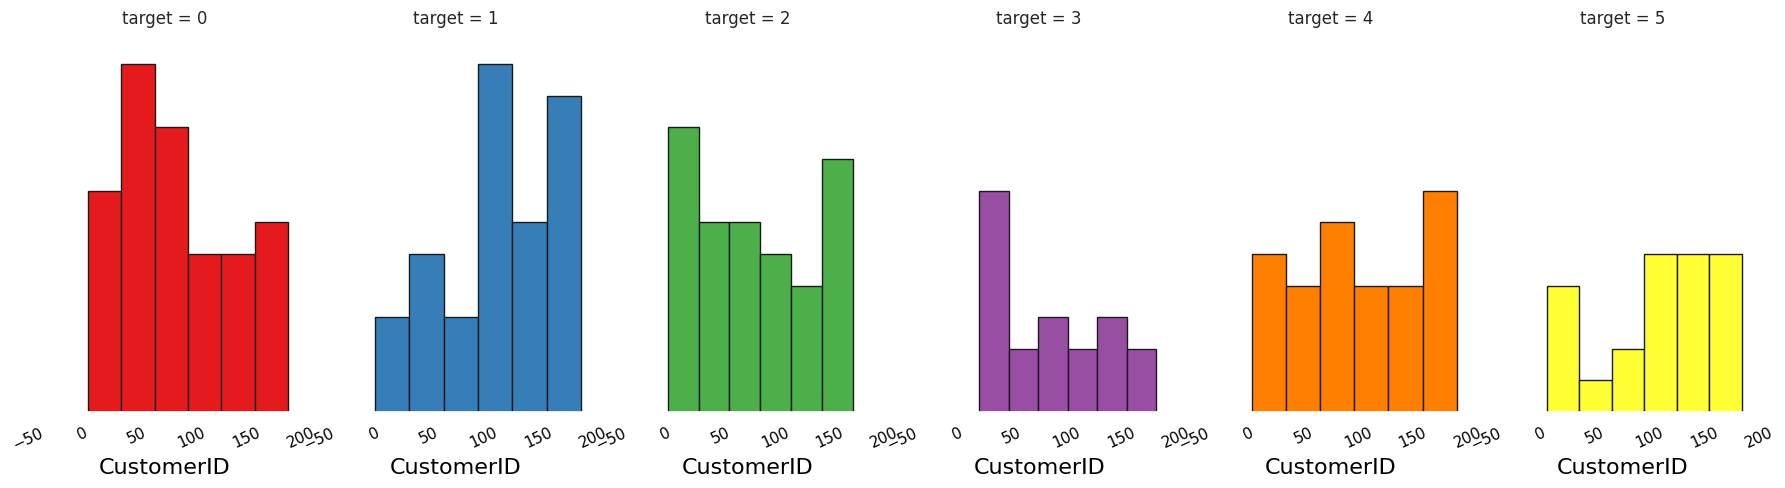

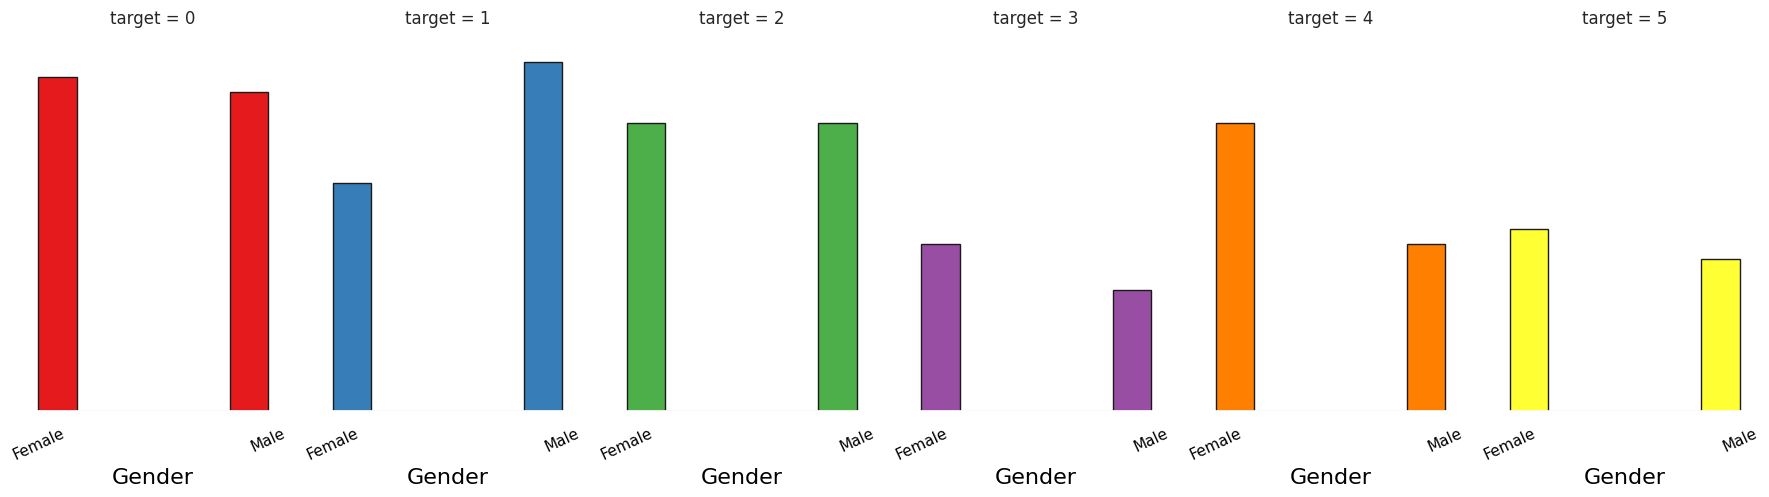

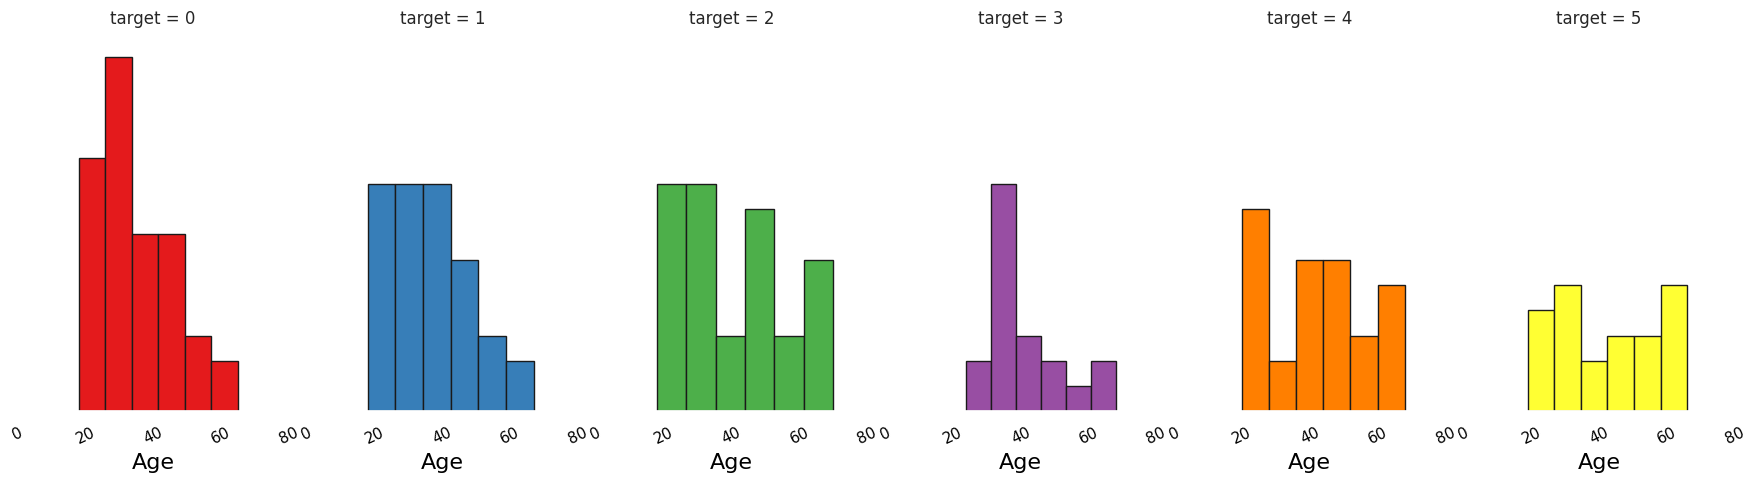

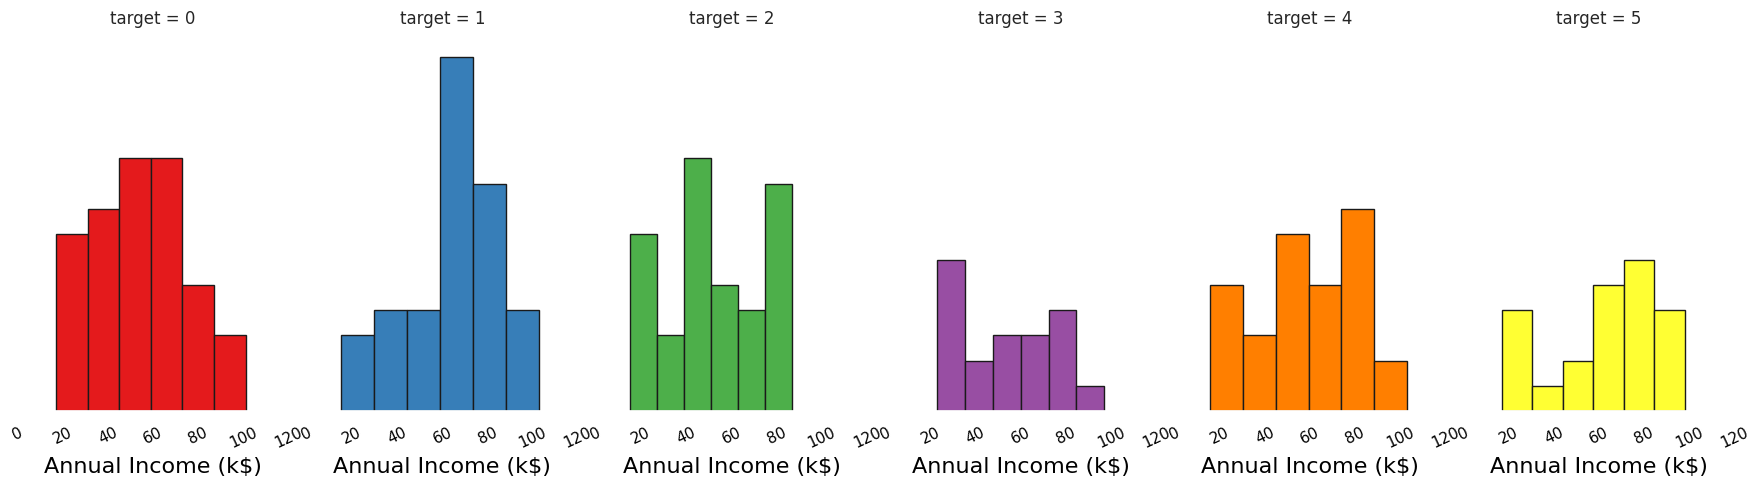

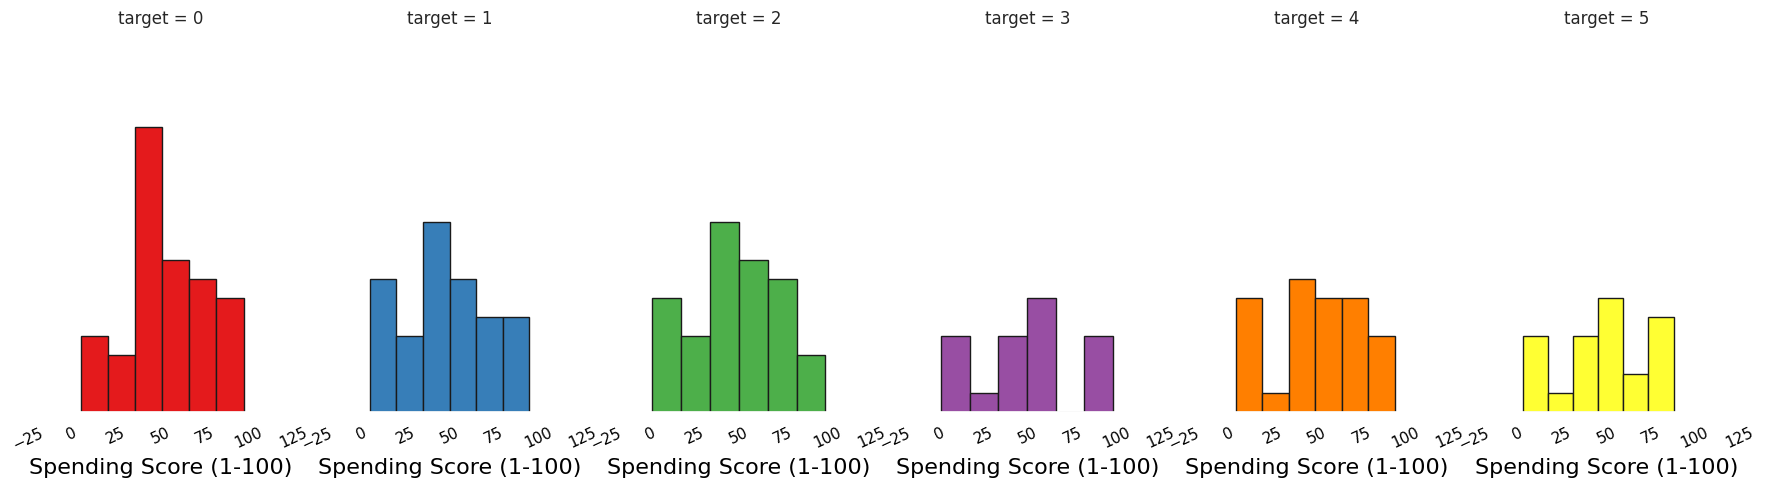

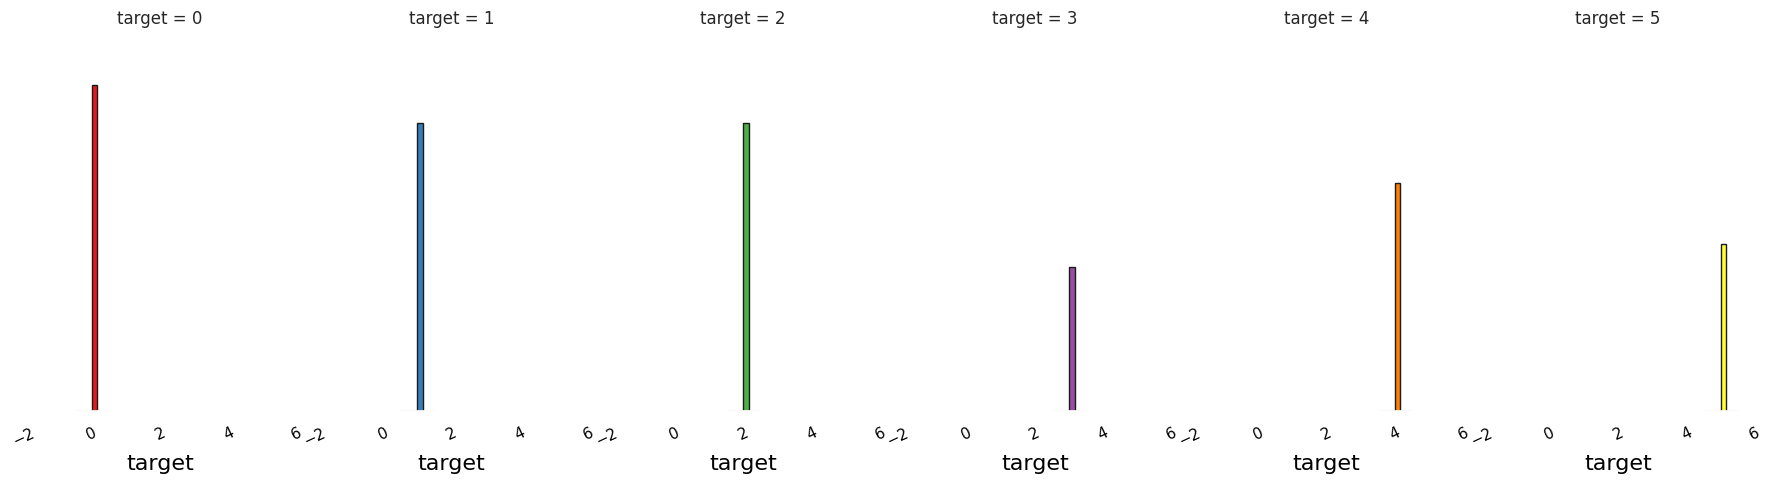

In [ ]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' :False, 'font.family': 'Ubuntu'})

for i in X_post:
    diag = sns.FacetGrid(X_post, col = "target", hue = "target", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'black')
    diag.set_yticklabels(color = 'black')
    diag.set_xlabels(size=16, color = 'black')
    diag.fig.set_figheight(6)